<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/PhonePriceCLF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
import pandas as pd
import numpy as np

In [185]:
df = pd.read_csv('/content/sample_data/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [186]:
df.shape

(2000, 21)

In [187]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [188]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [189]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [190]:
X = df.drop('price_range', axis=1)
y = df['price_range']

In [191]:
input_shape = X.shape[1]

In [192]:
from sklearn.preprocessing import MinMaxScaler

In [193]:
cols = X.columns
mms = MinMaxScaler(feature_range=(0, 1))
X = mms.fit_transform(X)

In [194]:
pd.DataFrame(X, columns=cols).head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0


In [195]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [196]:
model = keras.Sequential([
    layers.Dense(input_shape, activation='relu', input_shape=[input_shape]),
    layers.Dense(4, activation='relu')
])

In [197]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [198]:
history = model.fit(X, y, epochs=500, batch_size=128)

Epoch 1/500
16/16 [==============================] - 1s 2ms/step - loss: 1.4745 - accuracy: 0.2765
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 1.4186 - accuracy: 0.2855
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 1.3980 - accuracy: 0.2615
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 1.3902 - accuracy: 0.2490
Epoch 5/500
16/16 [==============================] - 0s 2ms/step - loss: 1.3878 - accuracy: 0.2410
Epoch 6/500
16/16 [==============================] - 0s 2ms/step - loss: 1.3857 - accuracy: 0.2430
Epoch 7/500
16/16 [==============================] - 0s 2ms/step - loss: 1.3844 - accuracy: 0.2405
Epoch 8/500
16/16 [==============================] - 0s 2ms/step - loss: 1.3832 - accuracy: 0.2460
Epoch 9/500
16/16 [==============================] - 0s 2ms/step - loss: 1.3821 - accuracy: 0.2470
Epoch 10/500
16/16 [==============================] - 0s 2ms/step - loss: 1.3802 - accuracy: 0.2520
Epoch 11/

<Axes: >

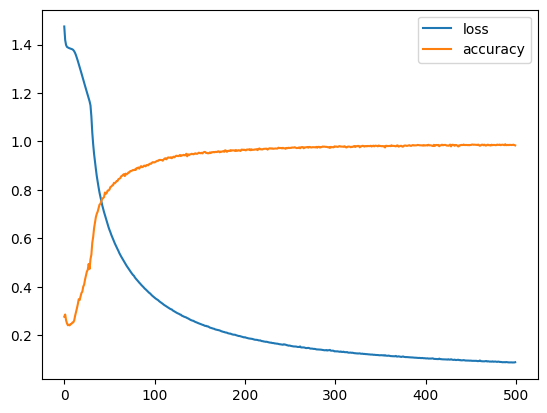

In [199]:
h_df = pd.DataFrame(history.history)
h_df.plot()

In [200]:
test = pd.read_csv('/content/sample_data/test.csv', index_col='id')

In [201]:
cols_t = test.columns
test = mms.fit_transform(test)

In [202]:
pd.DataFrame(test, columns=cols_t).head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.362241,1.0,0.52,1.0,0.736842,0.0,0.048387,0.000000,0.941667,0.285714,0.8,0.118511,0.608550,0.862319,0.500000,0.388889,0.000000,0.0,1.0,0.0
1,0.227485,1.0,0.00,1.0,0.210526,1.0,0.951613,0.777778,0.925000,0.571429,0.6,0.391190,0.237809,0.974772,0.071429,0.000000,0.277778,1.0,0.0,0.0
2,0.871915,1.0,0.92,0.0,0.052632,0.0,0.403226,0.888889,0.883333,0.285714,0.2,0.665967,0.577822,0.572464,0.857143,0.555556,0.444444,0.0,1.0,1.0
3,0.697799,0.0,0.00,1.0,0.947368,1.0,0.370968,0.444444,0.133333,1.000000,1.0,0.154693,0.835671,0.974235,0.357143,0.000000,0.277778,1.0,1.0,0.0
4,0.623082,0.0,0.36,0.0,0.578947,1.0,0.758065,0.444444,0.233333,0.714286,0.9,0.392764,0.206413,0.405260,0.714286,0.444444,0.277778,1.0,0.0,1.0


In [203]:
pred = model.predict(test)

32/32 [==============================] - 0s 1ms/step


In [204]:
pred

array([[ 0.        ,  0.        , 13.727198  , 15.562468  ],
       [ 0.        ,  0.        , 15.161856  , 21.583677  ],
       [ 0.        ,  1.6787193 , 12.243046  , 11.480244  ],
       ...,
       [15.834351  , 14.048264  ,  0.36235476,  0.        ],
       [ 0.        ,  5.9326506 ,  8.108183  ,  0.        ],
       [ 0.        ,  4.878371  , 10.751077  ,  3.23061   ]],
      dtype=float32)

In [211]:
df[df['price_range'] == 3].head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
10,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,3
11,1520,1,2.2,0,5,1,33,0.5,177,8,...,151,1005,3826,14,9,13,1,1,1,3
16,838,0,0.5,0,1,1,13,0.1,196,8,...,984,1850,3554,10,9,19,1,0,1,3
17,595,0,0.9,1,7,1,23,0.1,121,3,...,441,810,3752,10,2,18,1,1,0,3


In [214]:
pd.DataFrame(test, columns=cols_t).head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.362241,1.0,0.52,1.0,0.736842,0.0,0.048387,0.0,0.941667,0.285714,0.8,0.118511,0.60855,0.862319,0.5,0.388889,0.0,0.0,1.0,0.0


<img src='https://img.gta5-mods.com/q95/images/ifruit-phone-for-trevor/b02413-Screenshot(659).png' width=33%> <br>
Jesse!!! We need to play Angry Birds, Jesse!!